In [1]:
# Load the dataset to analyze its trend and seasonality
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Reading the dataset
file_path = 'data/data1analytical.csv'
df = pd.read_csv(file_path)

# Convert 'Date_Year' and 'Date_MonthName' to datetime and set as index
df['DateTime'] = pd.to_datetime(df['Date_Year'].astype(str) + df['Date_MonthName'], format='%Y%B')
df.set_index('DateTime', inplace=True)

## Decomposing the time series

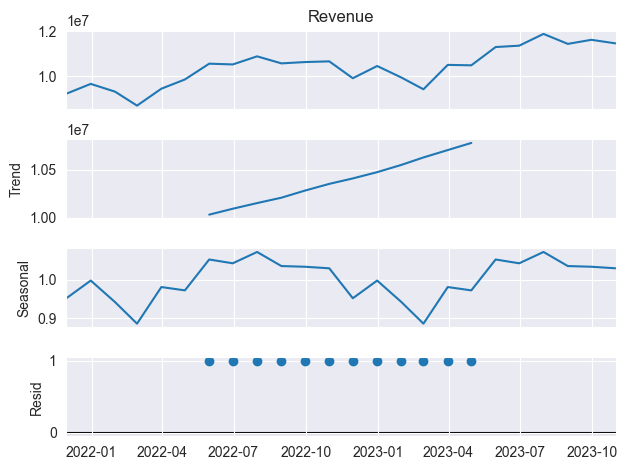

In [3]:
# Aggregate revenue by month
monthly_revenue = df['Revenue'].resample('M').sum()

# Decomposing the time series
result = seasonal_decompose(monthly_revenue, model='multiplicative')  # Try model='multiplicative' if needed

# Plotting the decomposed time series components
result.plot()
plt.show()

## Interpretation:
- The trend component shows a steady increase in revenue over time.
- The seasonal component shows a repeating pattern of peaks and troughs across months.
- The residual component shows the random fluctuations in the data that remain after removing the trend and seasonal components.
- The trend and seasonal components are additive in nature, i.e., the revenue in a given month is the sum of the trend, seasonal, and residual components for that month.

## Testing for stationarity

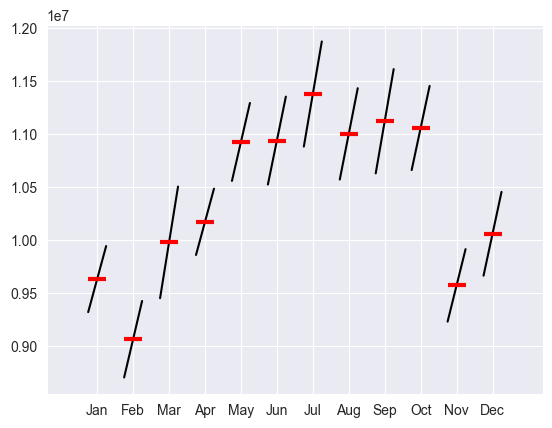

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Load and preprocess the dataset
df = pd.read_csv('data/Dataset1.csv')
df['DateTime'] = pd.to_datetime(df['Date_Year'].astype(str) + ' ' + df['Date_MonthName'], format='%Y %B')
df.set_index('DateTime', inplace=True)
monthly_revenue = df['Revenue'].resample('M').sum()

from statsmodels.graphics.tsaplots import month_plot

# Assuming the data has monthly frequency
month_plot(monthly_revenue)
plt.show()


## Interpretation:
- The plot shows that the data is not stationary, i.e., the mean and variance of the data change over time.
- The mean of the data appears to increase over time, indicating a trend.
- The variance of the data appears to increase over time, indicating heteroscedasticity.
- The data also appears to have a seasonal component, i.e., the peaks and troughs repeat across months.
- The data also appears to have an autocorrelation, i.e., the value of the data point in a given month is correlated with the value of the data point in the previous month.

## Testing for stationarity with metrics

In [5]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv('data/Dataset1.csv')  # Replace with the actual file path

# Convert 'Date_Year' and 'Date_MonthName' to datetime and set as index
df['DateTime'] = pd.to_datetime(df['Date_Year'].astype(str) + ' ' + df['Date_MonthName'], format='%Y %B')
df.set_index('DateTime', inplace=True)

# Aggregate revenue by month
monthly_revenue = df['Revenue'].resample('M').sum()

# Extracting month from index for grouping
months = monthly_revenue.index.month

# Calculating within-group and between-group variance
within_variance = monthly_revenue.groupby(months).var()
between_variance = monthly_revenue.var()

# Calculating the F-Statistic
f_statistic, p_value = stats.f_oneway(*[group for name, group in monthly_revenue.groupby(months)])

print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")


F-Statistic: 3.380703273950374, P-Value: 0.02344046208280339


## Interpretation:
- The relatively higher F-Statistic suggests that the revenue varies significantly across different months.
- The P-Value being lower than 0.05 indicates that this variation is statistically significant. 

This means that the differences in revenue between months are not just random fluctuations; they are likely due to actual seasonal effects.

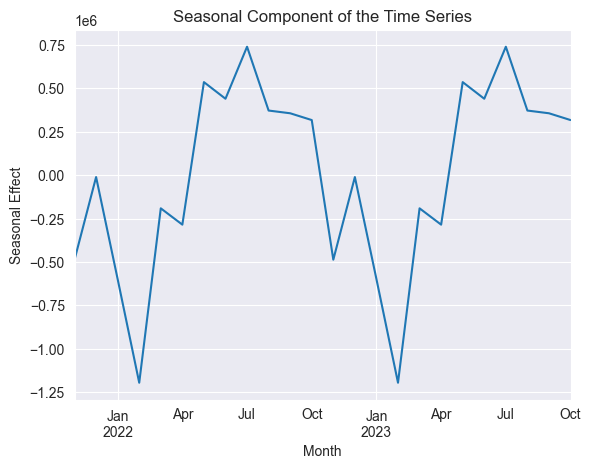

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
result = seasonal_decompose(monthly_revenue, model='additive')  # or 'multiplicative'

# Plot the seasonal component
result.seasonal.plot()
plt.title('Seasonal Component of the Time Series')
plt.xlabel('Month')
plt.ylabel('Seasonal Effect')
plt.show()


This plot shows repeating pattern of the seasonal effect across your data. 
Peaks and troughs in this plot indicate months with higher and lower revenue, respectively.

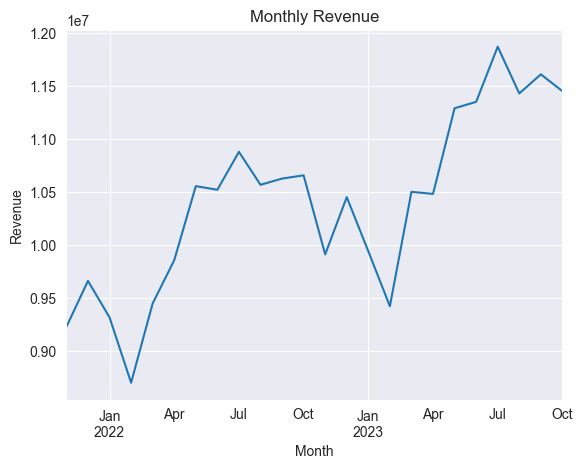

In [8]:
# Create a line chart of the monthly revenue for all years

# Aggregate revenue by month
monthly_revenue = df['Revenue'].resample('M').sum()

# Plot the monthly revenue
monthly_revenue.plot()
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()